# Hierarchical clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = data.iloc[:,3:]

In [5]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


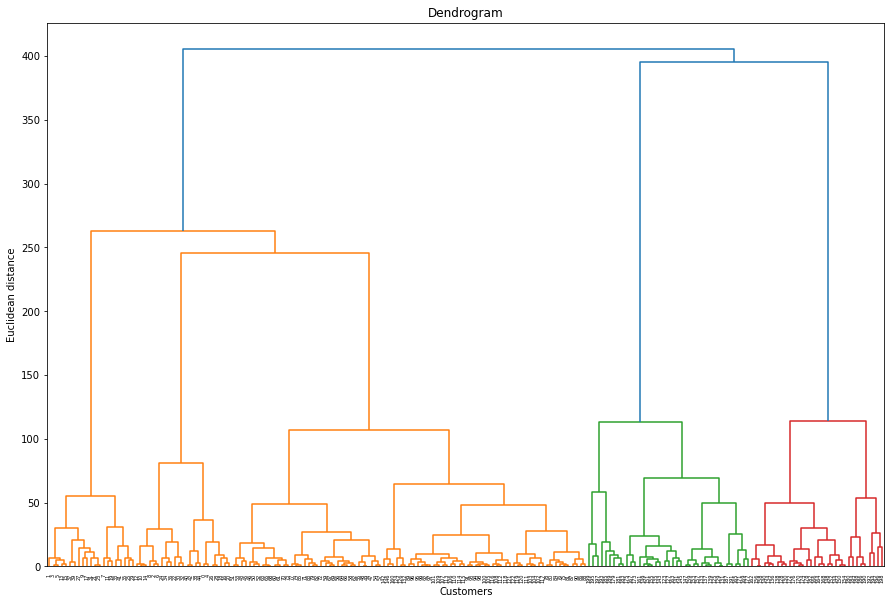

In [34]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,10))

dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))



plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')  #affinity = euclidean by default
model.fit_predict(df)  #  Hierarchical clustering has fit_predict instead of fit and predict.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

Text(0, 0.5, 'Spending score')

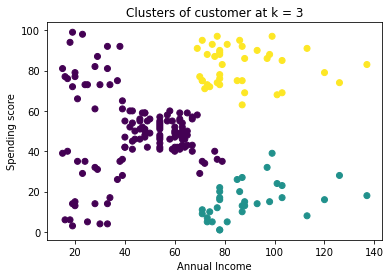

In [37]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=model.labels_)


plt.title('Clusters of customer at k = 3')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')

# K means clustering

In [7]:
from sklearn.cluster import KMeans


wcss
 [269981.28, 183653.3289473684, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37239.835542456036, 31605.868380230884, 25061.304119069333]


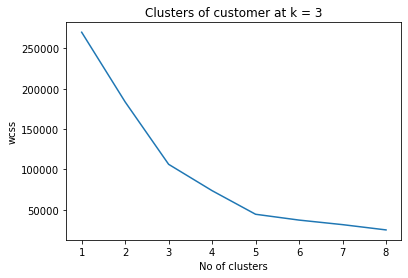

In [8]:
wcss = []

for i in range(1,9):
    m = KMeans(n_clusters = i)
    m.fit(df)
    wcss.append(m.inertia_)
    
print('wcss\n', wcss)
plt.plot(list(range(1,9)),wcss)
plt.title('Clusters of customer at k = 3')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# Best value of k = 5

In [9]:
kmeans = KMeans(5) #instantiating the k means function #5
kmeans.fit(df)

KMeans(n_clusters=5)

In [13]:
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [18]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

# Wholesale customer data


In [60]:
data = pd.read_csv("Wholesale customers data.csv")

In [61]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [62]:
from sklearn.preprocessing import normalize

In [63]:
scaled_data = normalize(data)

wcss
 [133.66289580141034, 58.21277219851365, 45.93724182358902, 36.8522279904059, 30.634766907043176, 26.95184582930097, 24.223045640985838, 22.196187282148372]


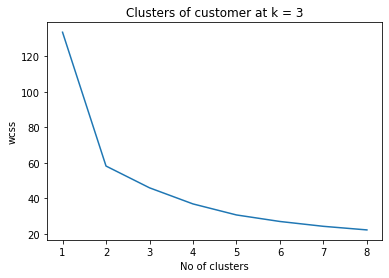

In [64]:
wcss = []

for i in range(1,9):
    m = KMeans(n_clusters = i)
    m.fit(scaled_data)
    wcss.append(m.inertia_)
    
print('wcss\n', wcss)
plt.plot(list(range(1,9)),wcss)
plt.title('Clusters of customer at k = 3')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [65]:
kmeans = KMeans(2) #instantiating the k means function #5
kmeans.fit_predict(scaled_data)

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,

In [68]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [70]:
scaled_data['l'] = kmeans.labels_

In [72]:
scaled_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,l
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,1
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,0
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,0
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,1
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,1
...,...,...,...,...,...,...,...,...,...
435,0.000026,0.000078,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646,1
436,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258,1
437,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827,0
438,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653,1


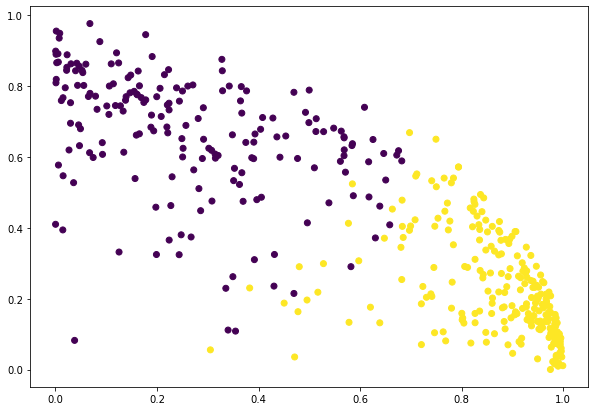

In [71]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaled_data['Fresh'], scaled_data['Grocery'], c=scaled_data['l'])